In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
# Importing the data
df=pd.read_csv("Insurance")

In [3]:
# Displaying first 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Displaying the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### There are no missing values and the datatypes are also correct.

## EDA

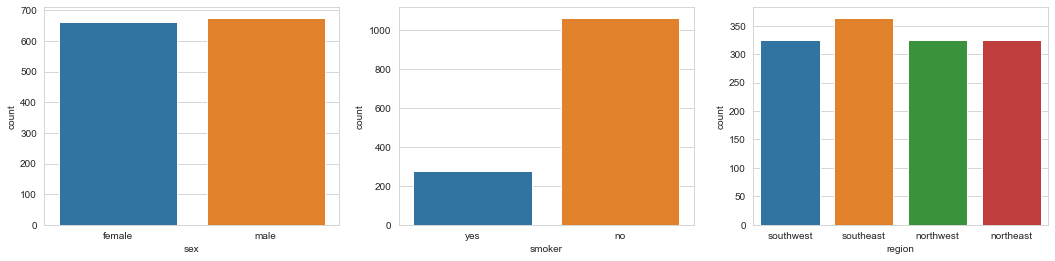

In [7]:
#Plot of categorical variables
cat = df.select_dtypes(exclude=np.number).columns.tolist()
plt.figure(figsize=(18,4))
for i,feature in enumerate(cat):
    plt.subplot(1,3,i+1)
    sns.countplot(df[feature])

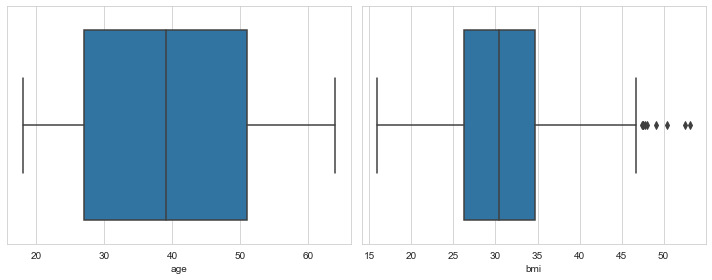

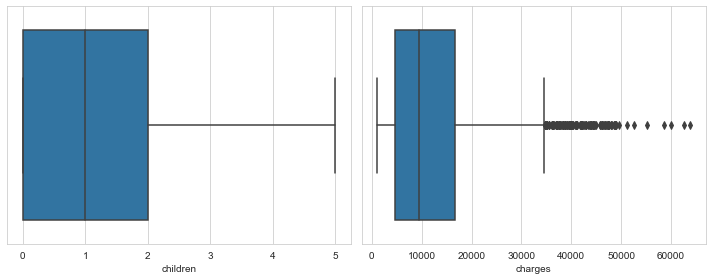

In [8]:
#taking a list of all the numerical features/columns
cols = df.select_dtypes(include=np.number).columns.tolist()
#Box plot of all the numerical features to identify outliers    
for col in range(0,len(cols),2):
    if len(cols) > col+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(df[cols[col]])
        plt.subplot(122)            
        sns.boxplot(df[cols[col+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(df[cols[col]])

##### From the box plot, we can see that there are some outliers in the bmi column. But there are many outliers in the charges column. To deal with outliers I am using Winsorization method.

In [9]:
#Treating outliers by Winsorization
from scipy.stats.mstats import winsorize
cols=['bmi','charges']
for col in cols:
        df[col] = winsorize(df[col], limits=[0.05, 0.1],inclusive=(True, True))

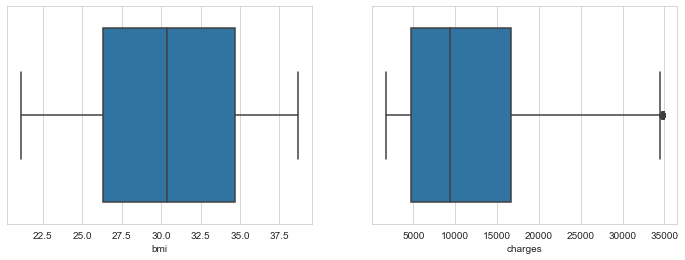

In [10]:
#Box plot of the features to after outlier treatment  
plt.figure(figsize=(12,4))
for i,feature in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[feature])

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1748.77400
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Separating the dependent and independent features

X = df.drop("charges",1)  
y = df["charges"]

In [13]:
X = pd.get_dummies(data=X, drop_first=True)

## Model Building

### Linear Regression

In [14]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 8)
(295, 8)
(1043,)
(295,)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(74.9578818116138, 74.28962187709209, 76.78325077510415)

In [17]:
y_predict = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 3443.4046320931684
Root Mean Square Error= 5243.787176657092


### OLS

In [19]:
import statsmodels.api as sm

In [20]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              1053.
Date:                Sat, 14 May 2022   Prob (F-statistic):                        0.00
Time:                        14:05:10   Log-Likelihood:                         -10414.
No. Observations:                1043   AIC:                                  2.084e+04
Df Residuals:                    1035   BIC:                                  2.088e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                205.8489     11.116     18.518      0.000     184.036     227.662
bmi                 47.5228     18.532      2.564      0.010      11.157      83.888
children           350.8676    137.423      2.553      0.011      81.209     620.526
sex_male          -351.1952    326.111     -1.077      0.282    -991.109     288.718
smoker_yes        1.964e+04    410.353     47.868      0.000    1.88e+04    2.04e+04
region_northwest -1249.4181    453.686     -2.754      0.006   -2139.667    -359.169
region_southeast -1379.1516    473.446     -2.913      0.004   -2308.175    -450.128
region_southwest -1761.0637    471.094     -3.738      0.000   -2685.472    -836.655
==============================================================================
Omnibus:                      345.542   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.514
Skew:                           1.680   Prob(JB):                    2.25e-220
Kurtosis:                       6.463   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From LR, we are getting the good scores in all cases.
##### From OLS, we can see that the feature called sex_male have high p-value. we can drop this column and run the model again.

In [21]:
X=X.drop("sex_male", axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 7)
(295, 7)
(1043,)
(295,)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(74.95381633744691, 74.28782087328109, 76.77237887688919)

In [25]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              1203.
Date:                Sat, 14 May 2022   Prob (F-statistic):                        0.00
Time:                        14:05:10   Log-Likelihood:                         -10414.
No. Observations:                1043   AIC:                                  2.084e+04
Df Residuals:                    1036   BIC:                                  2.088e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                205.4524     11.111     18.491      0.000     183.649     227.255
bmi                 42.9334     18.037      2.380      0.017       7.540      78.327
children           348.6955    137.418      2.537      0.011      79.045     618.346
smoker_yes         1.96e+04    408.784     47.957      0.000    1.88e+04    2.04e+04
region_northwest -1263.5457    453.531     -2.786      0.005   -2153.490    -373.602
region_southeast -1389.9775    473.376     -2.936      0.003   -2318.862    -461.093
region_southwest -1777.6293    470.879     -3.775      0.000   -2701.615    -853.644
==============================================================================
Omnibus:                      345.484   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.863
Skew:                           1.679   Prob(JB):                    1.89e-220
Kurtosis:                       6.465   Cond. No.                         207.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
print(model_OLS.mse_resid) #Mean squared errors of the residuals
print(model_OLS.mse_total) #Total Mean Squared errors 

27746508.552617908
251543513.1354989


##### Now we can use some other regression modeling techniques like Decision Tree, Random Forest to see the score.

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
DTT=DecisionTreeRegressor()
DTT.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
DTT.score(X,y)*100,DTT.score(X_train,y_train)*100,DTT.score(X_test,y_test)*100

(92.98338387895947, 99.93895662608622, 72.11489925150987)

In [29]:
y_predict = DTT.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error=", mae)

Mean Absolute Error= 2547.055848708476


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
y3_pred=rfr.predict(X_test)

In [33]:
mae=mean_absolute_error(y_test, y3_pred)
print("Mean Absolute Error=", mae)

Mean Absolute Error= 2375.2894313925603


In [34]:
rfr.score(X,y)*100,rfr.score(X_train,y_train)*100,rfr.score(X_test,y_test)*100

(93.28533178081983, 97.14552267982144, 81.68408209008918)

##### From Decision Tree and Random Forest, We are getting high scores, but the difference is also high between the scores. We can't use these algorithms as there is linear relationship between the dependent and independent features. Linear regression will be good for these types of problems and also it would be more logical to use LR.

<AxesSubplot:xlabel='charges', ylabel='Density'>

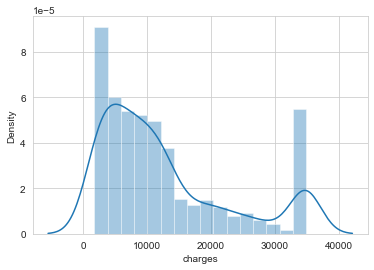

In [35]:
# Distribution of dependent variable
sns.distplot(df['charges'])

In [36]:
# The distribution is little skewed to right. So will take the log of it.
df['charges'] = np.log(df['charges'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

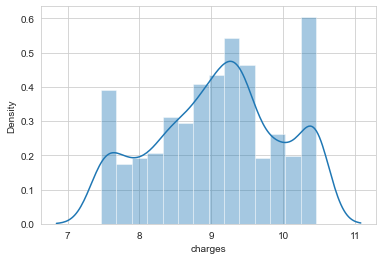

In [37]:
sns.distplot(df['charges'])

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.466670
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [39]:
X = df.drop("charges",1)   #Feature Matrix
y = df["charges"]          #Target Variable

In [40]:
X = pd.get_dummies(data=X, drop_first=True)

In [41]:
# Running the model again.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 8)
(295, 8)
(1043,)
(295,)


In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(75.36666846733424, 76.50978834524538, 71.5803664433594)

In [44]:
y_predict = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 0.2986627305668513
Root Mean Square Error= 0.48097094205029817


In [46]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              8077.
Date:                Sat, 14 May 2022   Prob (F-statistic):                        0.00
Time:                        14:05:11   Log-Likelihood:                         -1620.8
No. Observations:                1043   AIC:                                      3258.
Df Residuals:                    1035   BIC:                                      3297.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0608      0.002     25.059      0.000       0.056       0.066
bmi                  0.1853      0.004     45.846      0.000       0.177       0.193
children             0.2081      0.030      6.941      0.000       0.149       0.267
sex_male             0.1378      0.071      1.938      0.053      -0.002       0.277
smoker_yes           1.7665      0.090     19.734      0.000       1.591       1.942
region_northwest     0.6563      0.099      6.632      0.000       0.462       0.851
region_southeast    -0.0015      0.103     -0.015      0.988      -0.204       0.201
region_southwest     0.3858      0.103      3.754      0.000       0.184       0.587
==============================================================================
Omnibus:                        8.814   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.537
Skew:                           0.139   Prob(JB):                       0.0231
Kurtosis:                       2.690   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print(model_OLS.mse_resid) #Mean squared errors of the residuals
print(model_OLS.mse_total) #Total Mean Squared errors 

1.320125090053861
83.09138400377512


In [48]:
# region_southeast has high p-value. So dropping this feature.
X=X.drop('region_southeast',1)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1043, 7)
(295, 7)
(1043,)
(295,)


In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [51]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(75.04260471759207, 76.20899975802939, 71.17978412713697)

In [52]:
y_predict = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 0.30126361621941644
Root Mean Square Error= 0.48434878765838507


In [54]:
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              9239.
Date:                Sat, 14 May 2022   Prob (F-statistic):                        0.00
Time:                        14:05:12   Log-Likelihood:                         -1620.8
No. Observations:                1043   AIC:                                      3256.
Df Residuals:                    1036   BIC:                                      3290.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0608      0.002     25.113      0.000       0.056       0.066
bmi                  0.1853      0.004     51.673      0.000       0.178       0.192
children             0.2081      0.030      6.944      0.000       0.149       0.267
sex_male             0.1378      0.071      1.939      0.053      -0.002       0.277
smoker_yes           1.7664      0.089     19.810      0.000       1.591       1.941
region_northwest     0.6571      0.085      7.763      0.000       0.491       0.823
region_southwest     0.3866      0.088      4.401      0.000       0.214       0.559
==============================================================================
Omnibus:                        8.817   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.541
Skew:                           0.139   Prob(JB):                       0.0230
Kurtosis:                       2.690   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### After dropping the region_southeast feature, there is not much change in the results set, but since it's p-value is high, so it would be good to drop it.